In [1]:
import skimage.restoration as sr
import numpy as np
import dicom
import glob
import h5py
import os
import scipy.io as scio
from skimage import exposure
from skimage.io import imsave, imread
from scipy.misc import imresize
from medpy.filter.noise import immerkaer
from scipy.io import savemat
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [3]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [4]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Dataset/Resized_train//"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [5]:
print(filenames)

['train_1.png', 'train_2.png', 'train_3.png', 'train_4.png', 'train_5.png', 'train_6.png', 'train_7.png', 'train_8.png', 'train_9.png', 'train_10.png', 'train_11.png', 'train_12.png', 'train_13.png', 'train_14.png', 'train_15.png', 'train_16.png', 'train_17.png', 'train_18.png', 'train_19.png', 'train_20.png', 'train_21.png', 'train_22.png', 'train_23.png', 'train_24.png', 'train_25.png', 'train_26.png', 'train_27.png', 'train_28.png', 'train_29.png', 'train_30.png', 'train_31.png', 'train_32.png', 'train_33.png', 'train_34.png', 'train_35.png', 'train_36.png', 'train_37.png', 'train_38.png', 'train_39.png', 'train_40.png', 'train_41.png', 'train_42.png', 'train_43.png', 'train_44.png', 'train_45.png', 'train_46.png', 'train_47.png', 'train_48.png', 'train_49.png', 'train_50.png', 'train_51.png', 'train_52.png', 'train_53.png', 'train_54.png', 'train_55.png', 'train_56.png', 'train_57.png', 'train_58.png', 'train_59.png', 'train_60.png', 'train_61.png', 'train_62.png', 'train_63.png', 

In [6]:
images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = "L")
    images.append(image)
    print(filename)

train_1.png
train_2.png
train_3.png
train_4.png
train_5.png
train_6.png
train_7.png
train_8.png
train_9.png
train_10.png
train_11.png
train_12.png
train_13.png
train_14.png
train_15.png
train_16.png
train_17.png
train_18.png
train_19.png
train_20.png
train_21.png
train_22.png
train_23.png
train_24.png
train_25.png
train_26.png
train_27.png
train_28.png
train_29.png
train_30.png
train_31.png
train_32.png
train_33.png
train_34.png
train_35.png
train_36.png
train_37.png
train_38.png
train_39.png
train_40.png
train_41.png
train_42.png
train_43.png
train_44.png
train_45.png
train_46.png
train_47.png
train_48.png
train_49.png
train_50.png
train_51.png
train_52.png
train_53.png
train_54.png
train_55.png
train_56.png
train_57.png
train_58.png
train_59.png
train_60.png
train_61.png
train_62.png
train_63.png
train_64.png
train_65.png
train_66.png
train_67.png
train_68.png
train_69.png
train_70.png
train_71.png
train_72.png
train_73.png
train_74.png
train_75.png
train_76.png
train_77.png
train_78

In [7]:
print (len(images))

770


In [8]:
denoisedimages = []

In [9]:
hval = 10
alpha = 15
beta = 1

In [10]:
def denoiseImage(image):
    maxvalue = np.max(image)
    newimage = image*(255.0/maxvalue).astype(np.uint8)
    denoised = sr.denoise_nl_means(newimage, multichannel=False, h=hval)
    denoised = denoised - (alpha*beta)
    denoised[denoised<0]=0
    denoised = denoised.astype(np.uint8)
    denoisedimages.append(denoised)

In [11]:
for image in images:
    denoiseImage(image)

In [12]:
print (len(denoisedimages))

770


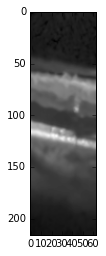

In [13]:
plt.imshow(denoisedimages[0],cmap="gray")

In [14]:
print (np.max(denoisedimages[0]))

233


In [15]:
imsave('/home/iplab/Desktop/denoised.png',denoisedimages[0])

In [16]:
for item in range(770):
    imsave('/home/iplab/Desktop/DenoisedTrain/denoised_'+str(item+1)+'.png',denoisedimages[item])